# HAND WRITTEN DIGIT RECOGNISION USING ARTIFICIAL NEURAL NETWORK
### USING THE MNIST DATASET 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_csv("/content/sample_data/mnist_train_small.csv")
data

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PREPROCESSING DATA
### EACH ROW CONTAINS LABEL AND THEN THE PIXELS OF THE IMAGE
### HENCE CONVERTING THEM INTO A 28 X 28 ARRAY

In [3]:
# DEFINING A FUNCTION TO PREPROCESS THE DATA
# CONVERTING THEM TO SHAPE(NUMBER,PIXEL,PIXEL)
def preprocess(df):
    digits = []
    labels = []
    for i in range(0,len(df)):
        # TAKING ONE DIGIT OUT OF THE DATAFRAME
        digit = np.array(df.iloc[i:i+1,1:])
        # RESHAPING TO MAKE AN IMAGE OF 28 X 28 PIXELS
        digit = digit.reshape(28,28)
        # EXTRACTING THE LABELS 
        label = df["6"][i]
        digits.append(digit)
        labels.append(label)
  
    # MAKING AN ARRAY OF DATA
    digits = np.array(digits)
    labels = np.array(labels)
    return digits,labels


In [4]:
digits,labels = preprocess(data)

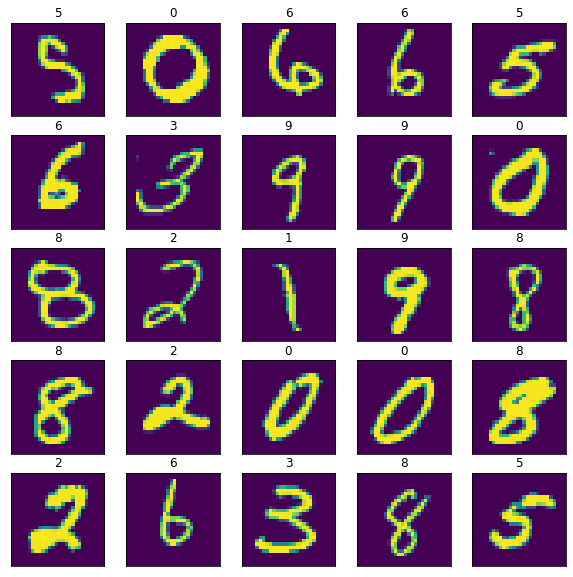

In [5]:
# SEEING OUR DATA
import random
fig,ax = plt.subplots(5,5,figsize=(10,10))
for i in range(0,5):
    for j in range(0,5):
        n = random.randint(0,len(digits))
        ax[i][j].imshow(digits[n])
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].set_title(f"{labels[n]}")

In [6]:
# SPLITTING OUR DATA INTO TRAIN AND TEST SETS
from sklearn.model_selection import train_test_split
x = digits
y = labels
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

In [7]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((15999, 28, 28), (15999,), (4000, 28, 28), (4000,))

# BUILDING OUR MODEL USING FLATTEN AND DENSE LAYERS

In [8]:
from keras.models import Sequential
from keras.layers import Flatten,Dense

In [54]:
# DEFINING OUR ANN MODEL
model = Sequential([
            Flatten(input_shape = (28, 28)),
            Dense(784, activation = 'relu'),
            Dense(392, activation = 'relu'),
            Dense(196, activation = 'relu'),
            Dense(10, activation = 'softmax')
])

model.compile ( loss = 'sparse_categorical_crossentropy',optimizer = 'adam',  metrics = ['accuracy'] )
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 784)               615440    
                                                                 
 dense_36 (Dense)            (None, 392)               307720    
                                                                 
 dense_37 (Dense)            (None, 196)               77028     
                                                                 
 dense_38 (Dense)            (None, 10)                1970      
                                                                 
Total params: 1,002,158
Trainable params: 1,002,158
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(xtrain,ytrain,epochs = 50,validation_split=0.2)

Epoch 1/50
400/400 [==============================] - 2s 5ms/step - loss: 0.0555 - accuracy: 0.9873 - val_loss: 0.2153 - val_accuracy: 0.9569
Epoch 2/50
400/400 [==============================] - 1s 4ms/step - loss: 0.0212 - accuracy: 0.9942 - val_loss: 0.2217 - val_accuracy: 0.9641
Epoch 3/50
400/400 [==============================] - 1s 4ms/step - loss: 0.0193 - accuracy: 0.9949 - val_loss: 0.2412 - val_accuracy: 0.9572
Epoch 4/50
400/400 [==============================] - 1s 4ms/step - loss: 0.0255 - accuracy: 0.9930 - val_loss: 0.3286 - val_accuracy: 0.9538
Epoch 5/50
400/400 [==============================] - 1s 4ms/step - loss: 0.0555 - accuracy: 0.9870 - val_loss: 0.2534 - val_accuracy: 0.9531
Epoch 6/50
400/400 [==============================] - 1s 3ms/step - loss: 0.0468 - accuracy: 0.9873 - val_loss: 0.3627 - val_accuracy: 0.9434
Epoch 7/50
400/400 [==============================] - 1s 4ms/step - loss: 0.0714 - accuracy: 0.9822 - val_loss: 0.3408 - val_accuracy: 0.9441
Epoch 

# MAKING PREDICTIONS

In [57]:
ypreds = model.predict(xtest)
# TAKING MAXIMUM VALUE OF PROBABILITIES TO MAKE OUR PREDICTIONS USING ARGMAX()
preds=[]
for i in range(0,len(ypreds)):
    preds.append(np.argmax(ypreds[i]))

# MAKING A DATAFRAME TO ACCES TRUE LABELS AND PREDICTED LABELS WITH EASE
df = pd.DataFrame({"TRUE":ytest,"PREDS":preds})
df


125/125 [==============================] - 0s 2ms/step


,TRUE,PREDS
0,9,9
1,6,6
2,7,7
3,3,3
4,8,8
...,...,...
3995,6,6
3996,0,0
3997,1,1
3998,9,9


# ANALYSING OUR MODEL

### 1. CLASSIFICATION REPORT

In [58]:
from sklearn.metrics import classification_report
rep = pd.DataFrame(classification_report(df["TRUE"],df["PREDS"],output_dict=True))
rep

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.994898,0.982833,0.989610,0.933962,0.975806,0.949045,0.970732,0.957041,0.894866,0.948655,0.95975,0.959745,0.960624
recall,0.939759,0.978632,0.936118,0.958838,0.957784,0.955128,0.992519,0.966265,0.953125,0.955665,0.95975,0.959383,0.959750
f1-score,0.966543,0.980728,0.962121,0.946237,0.966711,0.952077,0.981504,0.961631,0.923077,0.952147,0.95975,0.959278,0.959900
support,415.000000,468.000000,407.000000,413.000000,379.000000,312.000000,401.000000,415.000000,384.000000,406.000000,0.95975,4000.000000,4000.000000


### 2. CONFUSION MATRIX

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df["TRUE"],df["PREDS"])
cm

array([[390,   0,   0,   4,   0,   2,   7,   0,  11,   1],
       [  0, 458,   0,   1,   1,   0,   0,   2,   6,   0],
       [  0,   4, 381,   7,   0,   1,   0,   4,   9,   1],
       [  0,   1,   2, 396,   0,   7,   1,   1,   4,   1],
       [  0,   0,   1,   0, 363,   0,   2,   3,   3,   7],
       [  1,   0,   0,   8,   0, 298,   1,   0,   1,   3],
       [  0,   0,   0,   0,   1,   1, 398,   0,   1,   0],
       [  0,   0,   1,   0,   1,   1,   0, 401,   7,   4],
       [  1,   3,   0,   4,   0,   4,   1,   1, 366,   4],
       [  0,   0,   0,   4,   6,   0,   0,   7,   1, 388]])

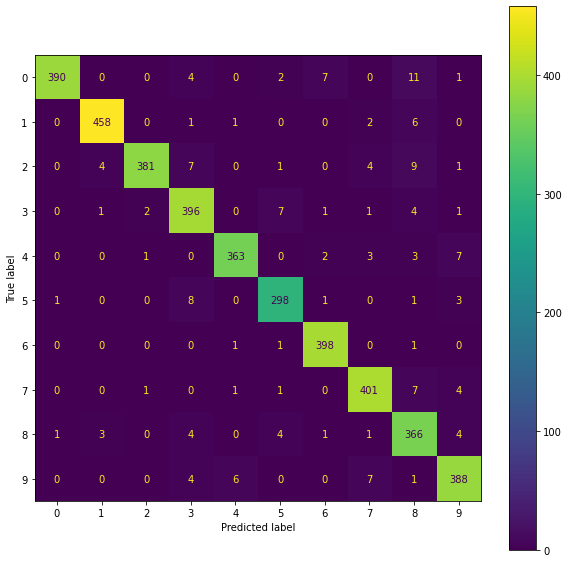

In [60]:
# VISUALISING THE CONFUSION MATRIX
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)

# VISUALISING OUR PREDICTIONS

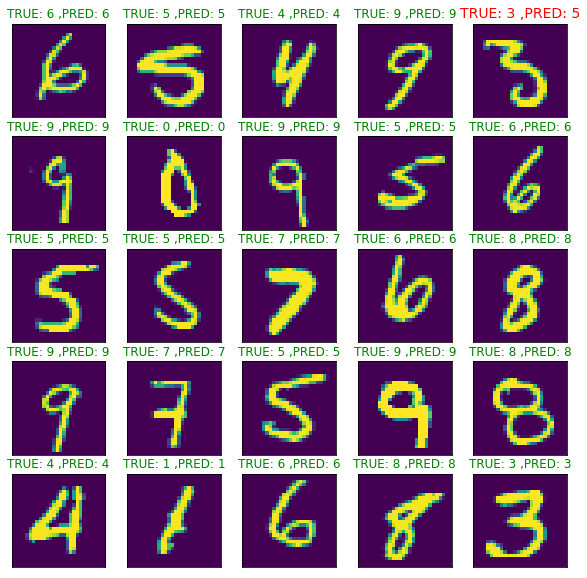

In [70]:
fig,ax = plt.subplots(5,5,figsize=(10,10))
for i in range(0,5):
    for j in range(0,5):
        n = random.randint(0,100)
        ax[i][j].imshow(xtest[n])
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        # SETTING COLOUR SCHEME FOR DISTINGUISHING PREDICTIONS
        if ytest[n] != preds[n]:
            ax[i][j].set_title(f"TRUE: {ytest[n]} ,PRED: {preds[n]}",color = "red",fontsize = 14)
        else:
            ax[i][j].set_title(f"TRUE: {ytest[n]} ,PRED: {preds[n]}",color = "green",fontsize = 12)
      